In [1]:
# Setup
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 14,
          'figure.figsize':(15.0, 8.0),
          'lines.linewidth': 2.,
          'lines.markersize': 15,}
matplotlib.rcParams.update(params)


# Ordinary differential equations (ODE)

## Scope

* Widely used in physics
* Closed form solutions only in particular cases
* Need for numerical solvers

## Introductive example

Point mass $P$ in free fall. 

Required data:

* gravity field $\vec g = (0, -g)$,
* Mass $m$,
* Initial position $P_0 = (0, 0)$
* Initial velocity $\vec V_0 = (v_{x0}, v_{y0})$

Problem formulation:
$$
\left\lbrace \begin{align*}
\ddot x & = 0\\
\ddot y & = -g
\end{align*}\right.
$$



## Closed form solution


$$
\left\lbrace \begin{align*}
x(t) &= v_{x0} t\\
y(t) &= -g \frac{t^2}{2} + v_{y0}t 
\end{align*}\right.
$$

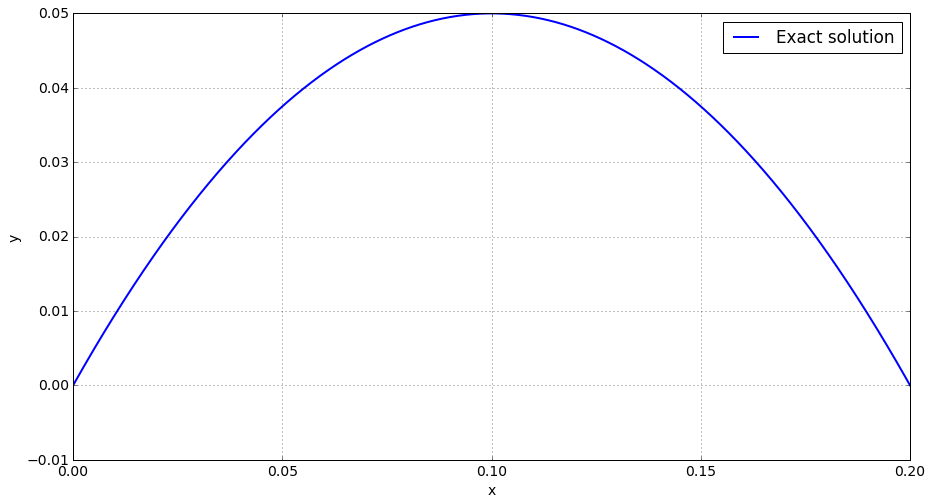

In [2]:
tmax = .2
t  = np.linspace(0., tmax, 1000) 
x0, y0   = 0., 0. 
vx0, vy0 = 1., 1.
g = 10.
x = vx0 * t
y = -g  * t**2/2. + vy0 * t
plt.plot(x, y, label = "Exact solution")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Reformulation

Any ODEs can be reformulated as a first order system equations. Let's assume that
$$
Y = \begin{bmatrix}
x \\
y \\
\dot x \\
\dot y \\
\end{bmatrix}
$$ 

As a consequence:

$$
\dot Y = \begin{bmatrix}
\dot x \\
\dot y \\
\ddot x \\
\ddot y \\
\end{bmatrix}
$$ 

Then, the initialy second order equation can be reformulated as:

$$
\dot Y = f(Y, t) = 
\begin{bmatrix}
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\ 
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{bmatrix}
Y + 
\begin{bmatrix}
0 \\
0 \\
0 \\
-g \\
\end{bmatrix}
$$ 

Generic problem

Solving $\dot Y = f(Y, t)$




## Numerical integration

* approximate solution: need for error estimation
* discrete time: $t_0$, $t_1$, $\ldots$
* time step $dt = t_{i+1} - t_i$,


## Euler method
* Intuitive
* Fast
* Slow convergence

$$
Y_{n+1} = Y_n + f(Y) dt
$$

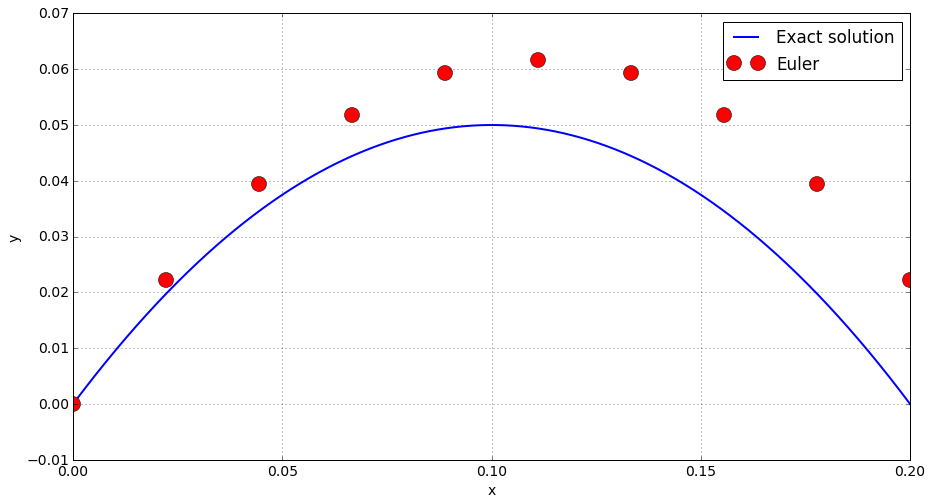

In [3]:
dt = 0.02 # Pas de temps
Y0 = np.array([0., 0., vx0, vy0])
nt = int(tmax/dt) # Nombre de pas
ti = np.linspace(0., nt * dt, nt)

def derivate(Y, t):
  return np.array([Y[2], Y[3], 0., -g])

def Euler(func, y0, t):
  dt = t[1] - t[0]
  nt = len(t)
  Y  = np.zeros([nt, len(y0)])
  Y[0] = y0
  for i in xrange(nt-1):
    Y[i+1] = Y[i] + func(Y[i], t[i]) * dt
  return Y

Y_euler = Euler(derivate, Y0, ti)
x_euler, y_euler = Y_euler[:,0], Y_euler[:,1]
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Runge Kutta 4



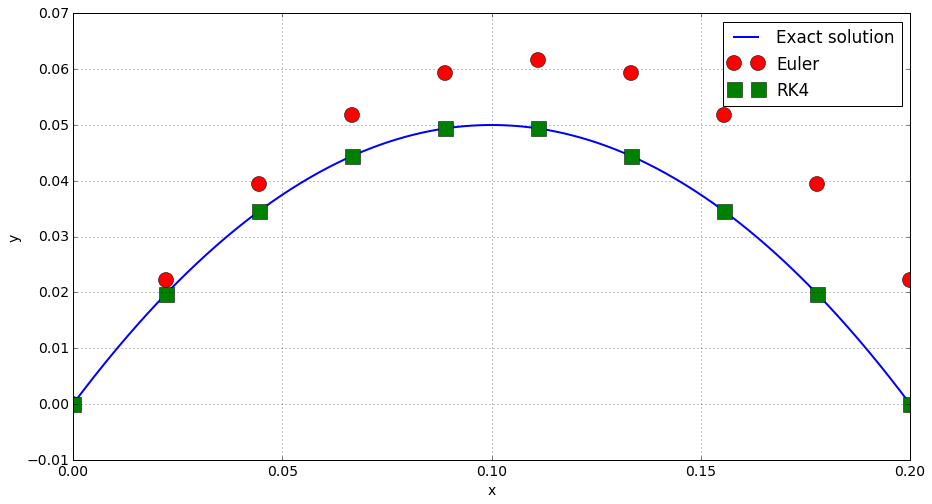

In [4]:
def RK4(func, y0, t):
  dt = t[1] - t[0]
  nt = len(t)
  Y  = np.zeros([nt, len(Y0)])
  Y[0] = y0
  for i in xrange(nt-1):
    k1 = func(Y[i], t[i])
    k2 = func(Y[i] + dt/2. * k1, t[i] + dt/2.)
    k3 = func(Y[i] + dt/2. * k2, t[i] + dt/2.)
    k4 = func(Y[i] + dt    * k3, t[i] + dt)
    Y[i+1] = Y[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
  return Y

Y_rk4 = RK4(derivate, Y0, ti)
x_rk4, y_rk4 = Y_rk4[:,0], Y_rk4[:,1]
plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Using ODEint 

http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.integrate.odeint.html

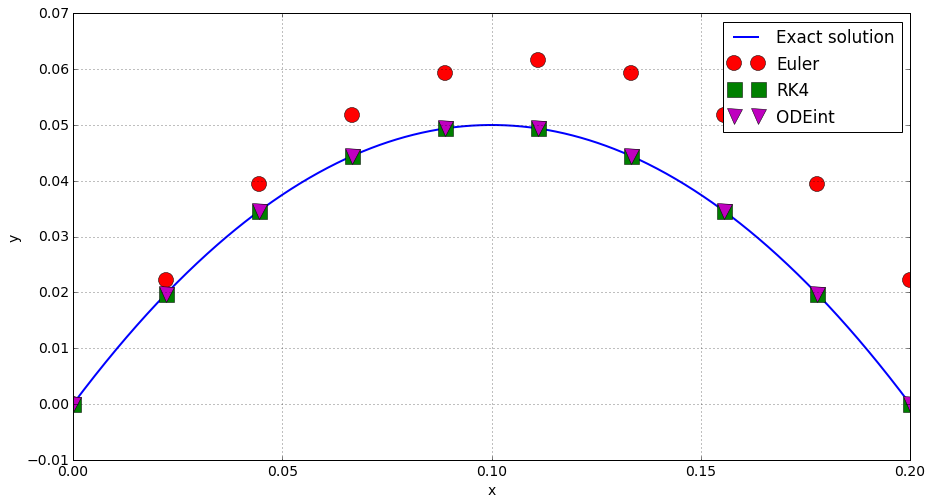

In [5]:
from scipy import integrate

Y_odeint = integrate.odeint(derivate, Y0, ti)
x_odeint, y_odeint = Y_odeint[:,0], Y_rk4[:,1]

plt.plot(x, y, label = "Exact solution")
plt.plot(x_euler, y_euler, "or", label = "Euler")
plt.plot(x_rk4, y_rk4, "gs", label = "RK4")
plt.plot(x_odeint, y_odeint, "mv", label = "ODEint")

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Tutorial

In this example, you have to model and animate a pendulum.

1. Write the constitutive equations.
2. Reformulate the equations as a first order system of ODEs.
3. Solve the problem using Euler, RK4 and ODE integrators.
4. Compare the results.